In [1]:
import climetlab as cml
import cems_flood_viewer as cmw

In [2]:
import geopandas as gpd

In [3]:
path = gpd.datasets.get_path("naturalearth_cities")
df= gpd.read_file(path)
df

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


In [4]:
df = df[(df.geometry.x > 150) & (df.geometry.y > 0)]

In [5]:
nwse = [50.972204,5.450796, 46.296530, 11.871059] # Ryne

In [6]:
gl_historical = cml.load_dataset(
            'cems-flood-glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            period= '20101001-20101010',#'2001-200401-04*',
            variable="river_discharge_in_the_last_24_hours",
            area = df
        )

By downloading data from this dataset, you agree to the terms and conditions defined at https://github.com/ecmwf-lab/climetlab_cems_flood/LICENSEIf you do not agree with such terms, do not download the data. 


2022-03-18 15:37:42,135 INFO Welcome to the CDS
2022-03-18 15:37:42,137 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-03-18 15:37:42,209 INFO Request is queued


KeyboardInterrupt: 

In [9]:
ds = gl_historical.to_xarray()

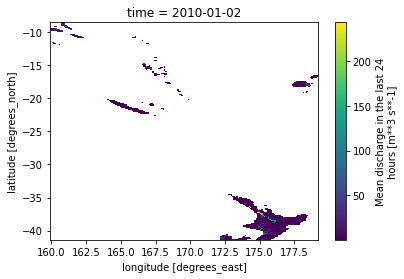

In [12]:
ds.dis24.isel(time=1).plot()

In [16]:
d2020 = cml.load_dataset(
            'cems-flood-glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            period='20200101-20200331',
            variable="river_discharge_in_the_last_24_hours",
            lat = 51.35,
            lon = -0.45
).to_xarray()

2022-02-10 11:24:38,455 WARNING Ignoring index file '/tmp/climetlab-iff/c-dsretriever-626a58295e94ee13af934aec9cf9ac4b60dadef9bc932e577069344e88629178.grib.923a8.idx' incompatible with GRIB file


In [17]:
d2021 = cml.load_dataset(
            'cems-flood-glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            period='20210101-20210331',
            variable="river_discharge_in_the_last_24_hours",
            lat = 51.35,
            lon = -0.45
).to_xarray()

2022-02-10 11:24:39,773 WARNING Ignoring index file '/tmp/climetlab-iff/c-dsretriever-682a78f1a3487be7bbb9129768643daf14e66479bbd6b13dd4ad8c00ac46bcf6.grib.923a8.idx' incompatible with GRIB file


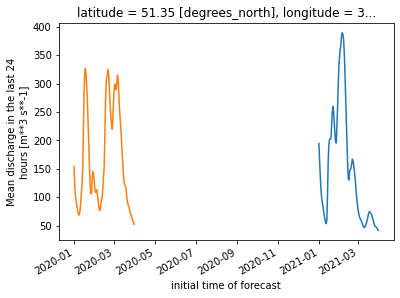

In [18]:
d2021.dis24[:,0,0].plot()
d2020.dis24[:,0,0].plot()